# Feature importance 

In [52]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# Load the Iris dataset
iris = pd.read_csv("iris_data.csv")
X = iris.iloc[:, 0:-1]  #data

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris.iloc[:, 4])  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of classifiers
classifier_list = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GaussianNB(),
    xgb.XGBClassifier(random_state=42),
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Iterate through each classifier
for classifier in classifier_list:
    print(f"Classifier: {classifier.__class__.__name__}")
    
    # Initialize lists to store results for each fold
    fold_aucs = []
    
    # Iterate through each fold
    for train_index, test_index in skf.split(X_train, y_train):
        X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
        y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
        
        # Train the classifier
        classifier.fit(X_fold_train, y_fold_train)
        
        # Calculate AUC for the fold (using 'ovr' strategy for multi-class)
        y_pred_proba = classifier.predict_proba(X_fold_test)
        auc = roc_auc_score(y_fold_test, y_pred_proba, multi_class='ovr')
        fold_aucs.append(auc)
    
    # Calculate and print the mean fold AUC
    mean_auc = sum(fold_aucs) / len(fold_aucs)
    print(f"Mean Fold AUC: {mean_auc:.4f}")
    
    # Train the classifier on the full training dataset
    classifier.fit(X_train, y_train)
    
    # Calculate and print the feature importances on the full training dataset
    feature_importances = classifier.feature_importances_ if hasattr(classifier, 'feature_importances_') else None

    # Get the real feature names from the Iris dataset
    feature_names = iris.columns[:-1]  # Use all columns except the last one

    # Print the feature importances with their corresponding names
    if feature_importances is not None:
        print("Feature Importances :")
        for i, (name, importance) in enumerate(zip(feature_names, feature_importances)):
            print(f"{name}: {importance:.4f}")
    else:
        print("This classifier does not provide feature importances.")
    
    # Calculate and print the AUC on the testing dataset (using 'ovr' strategy for multi-class)
    y_test_pred_proba = classifier.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
    print(f"Testing AUC: {test_auc:.4f}")
    
    print("\n")


Classifier: RandomForestClassifier
Mean Fold AUC: 0.9871
Feature Importances :
sepal length (cm): 0.1041
sepal width (cm): 0.0446
petal length (cm): 0.4173
petal width (cm): 0.4340
Testing AUC: 1.0000


Classifier: GradientBoostingClassifier
Mean Fold AUC: 0.9815
Feature Importances :
sepal length (cm): 0.0045
sepal width (cm): 0.0189
petal length (cm): 0.5913
petal width (cm): 0.3854
Testing AUC: 1.0000


Classifier: ExtraTreesClassifier
Mean Fold AUC: 0.9867
Feature Importances :
sepal length (cm): 0.0953
sepal width (cm): 0.0710
petal length (cm): 0.4253
petal width (cm): 0.4084
Testing AUC: 1.0000


Classifier: DecisionTreeClassifier
Mean Fold AUC: 0.9300
Feature Importances :
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876
Testing AUC: 1.0000


Classifier: AdaBoostClassifier
Mean Fold AUC: 0.9703
Feature Importances :
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.4700
petal width (cm): 0.5300
Testing A

# Graph

Evaluating ExtraTreesClassifier
  - Average AUC Score with 5-fold CV: 0.9867
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.0842
  - Test AUC Score: 0.8152
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0797
  - Test AUC Score: 0.6963
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4504
  - Test AUC Score: 0.9853
Feature 4 (petal width (cm)):
  - Feature Importance: 0.3857
  - Test AUC Score: 0.9672


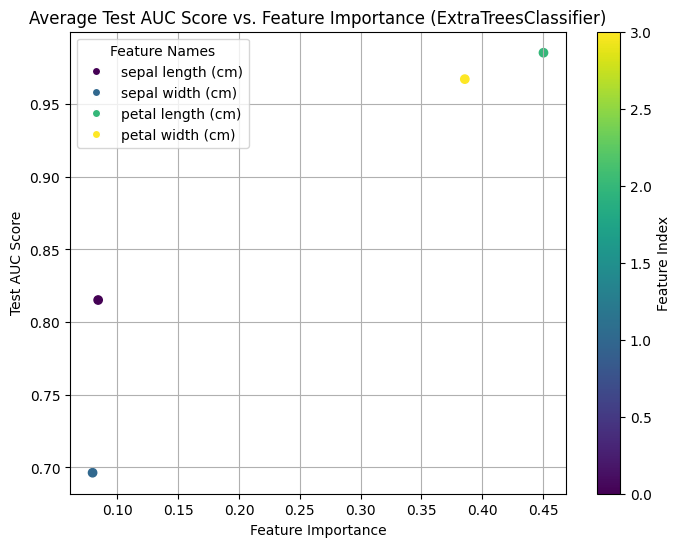

Evaluating RandomForestClassifier
  - Average AUC Score with 5-fold CV: 0.9871
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.1054
  - Test AUC Score: 0.8207
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0387
  - Test AUC Score: 0.7062
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4317
  - Test AUC Score: 0.9873
Feature 4 (petal width (cm)):
  - Feature Importance: 0.4242
  - Test AUC Score: 0.9787


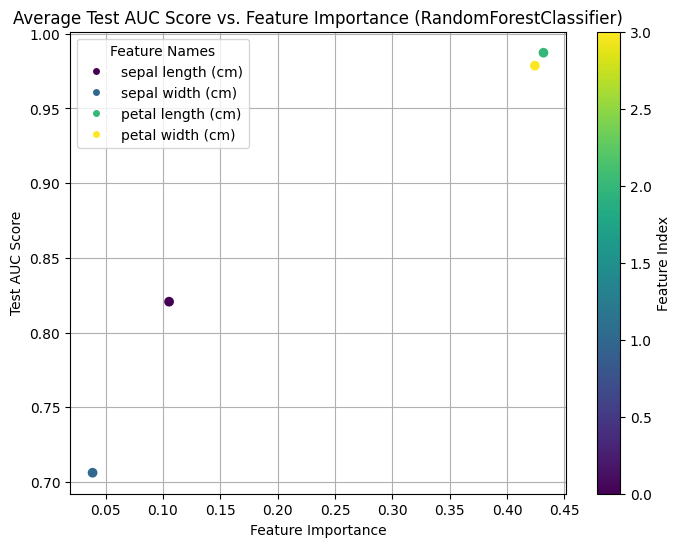

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split and standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifier_list = [ExtraTreesClassifier(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Main loop for each classifier
for clf in classifier_list:
    print(f"Evaluating {clf.__class__.__name__}")

    # 5-Fold Cross-validation
    auc_scores_cv = []
    for train_index, valid_index in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train[train_index], X_train[valid_index]
        y_train_cv, y_valid_cv = y_train[train_index], y_train[valid_index]

        # Fit the classifier
        clf.fit(X_train_cv, y_train_cv)

        # Make predictions
        y_prob_cv = clf.predict_proba(X_valid_cv)

        # Calculate AUC score
        auc_score_cv = roc_auc_score(y_valid_cv, y_prob_cv, multi_class='ovr')
        auc_scores_cv.append(auc_score_cv)

    # Average AUC Score over 5-folds
    average_auc_score_cv = np.mean(auc_scores_cv)
    print(f"  - Average AUC Score with 5-fold CV: {average_auc_score_cv:.4f}")

    # Initialize lists to store AUC scores and feature importances
    auc_scores = []
    feature_importances_list = []

    feature_names = iris.feature_names
    for i, (name, importance) in enumerate(zip(feature_names, clf.feature_importances_)):
        # Single feature training and testing
        X_single = X[:, i].reshape(-1, 1)

        auc_scores_feature = []
        for train_index, test_index in skf.split(X_single, y):
            X_train_single, X_test_single = X_single[train_index], X_single[test_index]
            y_train_single, y_test_single = y[train_index], y[test_index]

            # Standardize
            scaler = StandardScaler()
            X_train_single = scaler.fit_transform(X_train_single)
            X_test_single = scaler.transform(X_test_single)

            # Train and predict
            clf_single_feature = clf.__class__()
            clf_single_feature.fit(X_train_single, y_train_single)
            y_prob = clf_single_feature.predict_proba(X_test_single)

            # Calculate AUC score
            auc_score = roc_auc_score(y_test_single, y_prob, multi_class='ovr')
            auc_scores_feature.append(auc_score)

        average_auc_score = np.mean(auc_scores_feature)
        
        # Store AUC and importance scores
        auc_scores.append(average_auc_score)
        feature_importances_list.append(importance)

        print(f"Feature {i+1} ({name}):")
        print(f"  - Feature Importance: {importance:.4f}")
        print(f"  - Test AUC Score: {average_auc_score:.4f}")

    # Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        feature_importances_list, auc_scores, c=range(len(auc_scores)), cmap='viridis', marker='o', label='Features'
    )
    plt.xlabel('Feature Importance')
    plt.ylabel('Test AUC Score')
    plt.title(f'Average Test AUC Score vs. Feature Importance ({clf.__class__.__name__})')
    plt.colorbar(scatter, label='Feature Index')

    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=feature_names[i], markerfacecolor=c)
               for i, c in enumerate(plt.cm.viridis(np.linspace(0, 1, len(feature_names))))]
    plt.legend(handles=handles, title='Feature Names')

    plt.grid(True)
    plt.show()


Evaluating RandomForestClassifier
  - Average AUC Score with 5-fold CV: 0.9871
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.1054
  - Test AUC Score: 0.8253
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0387
  - Test AUC Score: 0.6972
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4317
  - Test AUC Score: 0.9873
Feature 4 (petal width (cm)):
  - Feature Importance: 0.4242
  - Test AUC Score: 0.9787


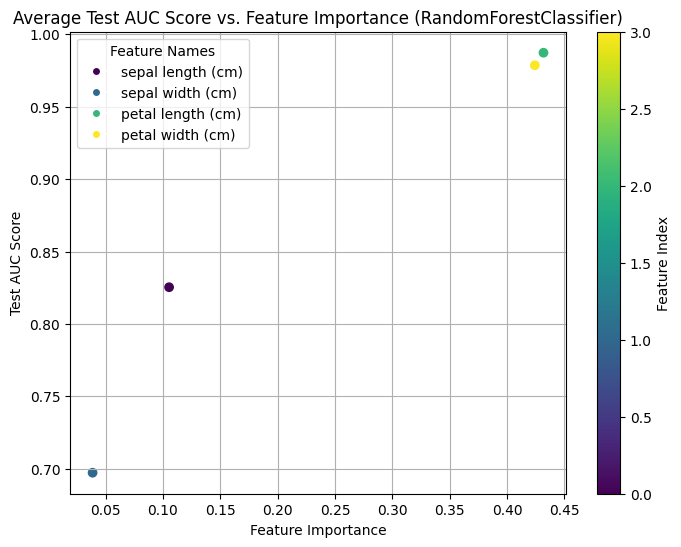

Evaluating GradientBoostingClassifier
  - Average AUC Score with 5-fold CV: 0.9815
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.0103
  - Test AUC Score: 0.8333
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0193
  - Test AUC Score: 0.7000
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4445
  - Test AUC Score: 0.9867
Feature 4 (petal width (cm)):
  - Feature Importance: 0.5258
  - Test AUC Score: 0.9820


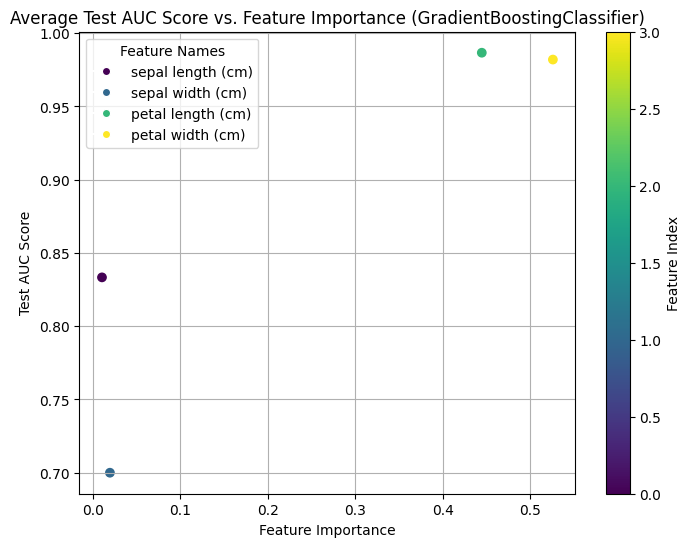

Evaluating ExtraTreesClassifier
  - Average AUC Score with 5-fold CV: 0.9867
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.0842
  - Test AUC Score: 0.8152
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0797
  - Test AUC Score: 0.6963
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4504
  - Test AUC Score: 0.9853
Feature 4 (petal width (cm)):
  - Feature Importance: 0.3857
  - Test AUC Score: 0.9672


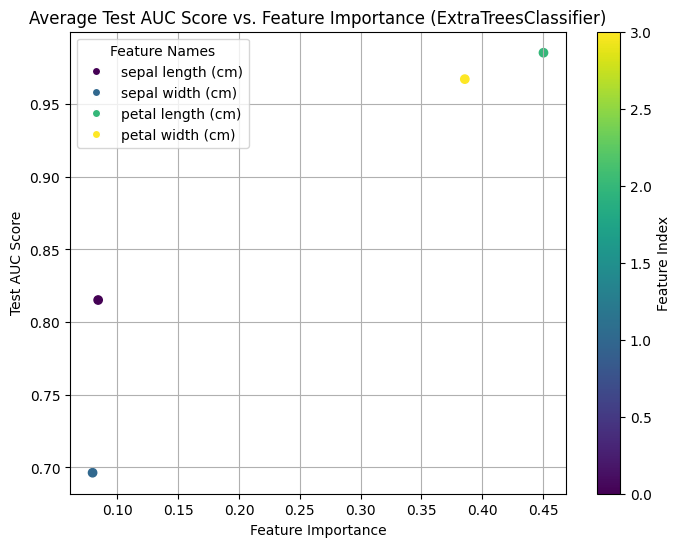

Evaluating DecisionTreeClassifier
  - Average AUC Score with 5-fold CV: 0.9300
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.0299
  - Test AUC Score: 0.8107
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0323
  - Test AUC Score: 0.6927
Feature 3 (petal length (cm)):
  - Feature Importance: 0.8793
  - Test AUC Score: 0.9833
Feature 4 (petal width (cm)):
  - Feature Importance: 0.0585
  - Test AUC Score: 0.9673


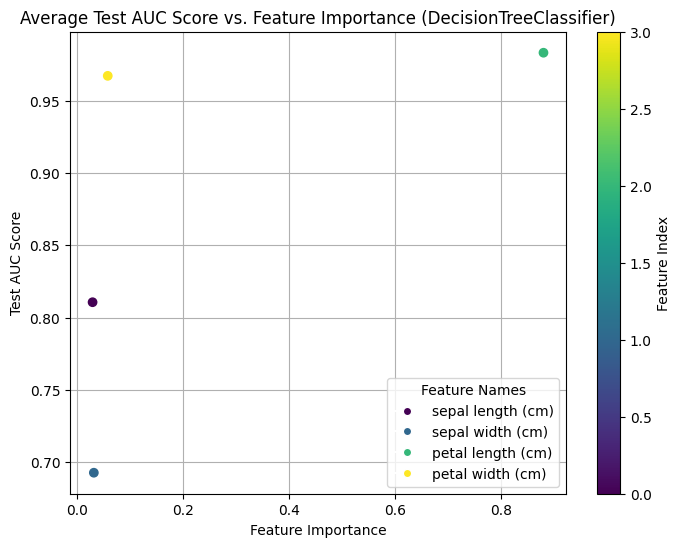

Evaluating AdaBoostClassifier
  - Average AUC Score with 5-fold CV: 0.9703
Feature 1 (sepal length (cm)):
  - Feature Importance: 0.0000
  - Test AUC Score: 0.7883
Feature 2 (sepal width (cm)):
  - Feature Importance: 0.0000
  - Test AUC Score: 0.6663
Feature 3 (petal length (cm)):
  - Feature Importance: 0.4700
  - Test AUC Score: 0.9767
Feature 4 (petal width (cm)):
  - Feature Importance: 0.5300
  - Test AUC Score: 0.9780


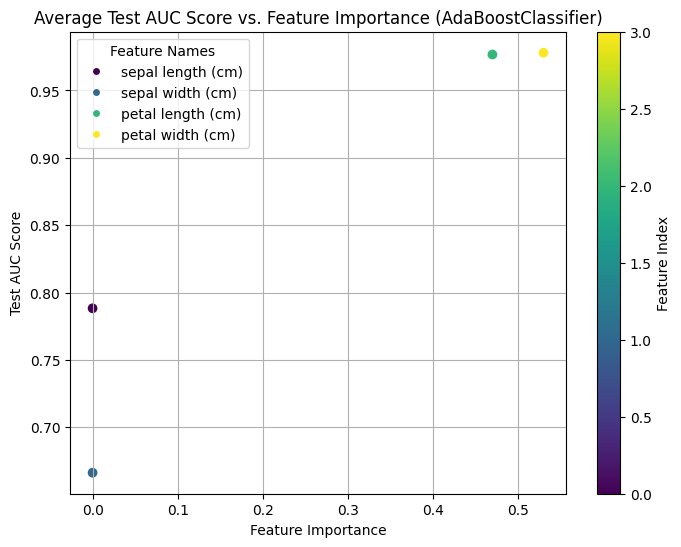

Evaluating GaussianNB
  - Average AUC Score with 5-fold CV: 0.9908


AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split and standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifier_list = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GaussianNB(),
    xgb.XGBClassifier(random_state=42),
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Main loop for each classifier
for clf in classifier_list:
    print(f"Evaluating {clf.__class__.__name__}")

    # 5-Fold Cross-validation
    auc_scores_cv = []
    for train_index, valid_index in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train[train_index], X_train[valid_index]
        y_train_cv, y_valid_cv = y_train[train_index], y_train[valid_index]

        # Fit the classifier
        clf.fit(X_train_cv, y_train_cv)

        # Make predictions
        y_prob_cv = clf.predict_proba(X_valid_cv)

        # Calculate AUC score
        auc_score_cv = roc_auc_score(y_valid_cv, y_prob_cv, multi_class='ovr')
        auc_scores_cv.append(auc_score_cv)

    # Average AUC Score over 5-folds
    average_auc_score_cv = np.mean(auc_scores_cv)
    print(f"  - Average AUC Score with 5-fold CV: {average_auc_score_cv:.4f}")

    # Initialize lists to store AUC scores and feature importances
    auc_scores = []
    feature_importances_list = []

    feature_names = iris.feature_names
    for i, (name, importance) in enumerate(zip(feature_names, clf.feature_importances_)):
        # Single feature training and testing
        X_single = X[:, i].reshape(-1, 1)

        auc_scores_feature = []
        for train_index, test_index in skf.split(X_single, y):
            X_train_single, X_test_single = X_single[train_index], X_single[test_index]
            y_train_single, y_test_single = y[train_index], y[test_index]

            # Standardize
            scaler = StandardScaler()
            X_train_single = scaler.fit_transform(X_train_single)
            X_test_single = scaler.transform(X_test_single)

            # Train and predict
            clf_single_feature = clf.__class__()
            clf_single_feature.fit(X_train_single, y_train_single)
            y_prob = clf_single_feature.predict_proba(X_test_single)

            # Calculate AUC score
            auc_score = roc_auc_score(y_test_single, y_prob, multi_class='ovr')
            auc_scores_feature.append(auc_score)

        average_auc_score = np.mean(auc_scores_feature)
        
        # Store AUC and importance scores
        auc_scores.append(average_auc_score)
        feature_importances_list.append(importance)

        print(f"Feature {i+1} ({name}):")
        print(f"  - Feature Importance: {importance:.4f}")
        print(f"  - Test AUC Score: {average_auc_score:.4f}")

    # Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        feature_importances_list, auc_scores, c=range(len(auc_scores)), cmap='viridis', marker='o', label='Features'
    )
    plt.xlabel('Feature Importance')
    plt.ylabel('Test AUC Score')
    plt.title(f'Average Test AUC Score vs. Feature Importance ({clf.__class__.__name__})')
    plt.colorbar(scatter, label='Feature Index')

    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=feature_names[i], markerfacecolor=c)
               for i, c in enumerate(plt.cm.viridis(np.linspace(0, 1, len(feature_names))))]
    plt.legend(handles=handles, title='Feature Names')

    plt.grid(True)
    plt.show()
